In [6]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
def visualize_next_token_predictions(text, model_name="distilgpt2", top_k=10):
    
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForCausalLM.from_pretrained(model_name)
    print(model.transformer.wte)
    
    
    inputs = tokenizer(text, return_tensors="pt")
    
    
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
    
    
    next_token_logits = logits[0, -1, :]
    probabilities = torch.nn.functional.softmax(next_token_logits, dim=0)
    
    
    top_k_probs, top_k_indices = torch.topk(probabilities, top_k)
    
    
    top_k_tokens = [tokenizer.decode([idx.item()]) for idx in top_k_indices]
    
    
    plt.figure(figsize=(12, 6))
    
    
    bars = plt.barh(range(top_k), top_k_probs.numpy())
    
    
    plt.yticks(range(top_k), top_k_tokens)
    plt.xlabel('Probability')
    plt.title(f'Top {top_k} Next Token Predictions\nInput: "{text}"')
    
    
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2,
                f'{width:.3f}',
                ha='left', va='center', fontweight='bold')
    
    
    sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, 
                              norm=plt.Normalize(vmin=min(top_k_probs), 
                                               vmax=max(top_k_probs)))
    for bar, prob in zip(bars, top_k_probs):
        bar.set_color(sm.to_rgba(prob))
    
    plt.tight_layout()
    plt.show()


In [8]:
def demonstrate_predictions():
    examples = [
        "The cat sat on the",
        "I love to eat",
        "The weather today is",
        "Once upon a"
    ]
    
    for example in examples:
        print(f"\nAnalyzing: '{example}'")
        visualize_next_token_predictions(example)
        input("Press Enter to continue to next example...")



Analyzing: 'The cat sat on the'


model.safetensors:  18%|#7        | 62.9M/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Embedding(50257, 768)


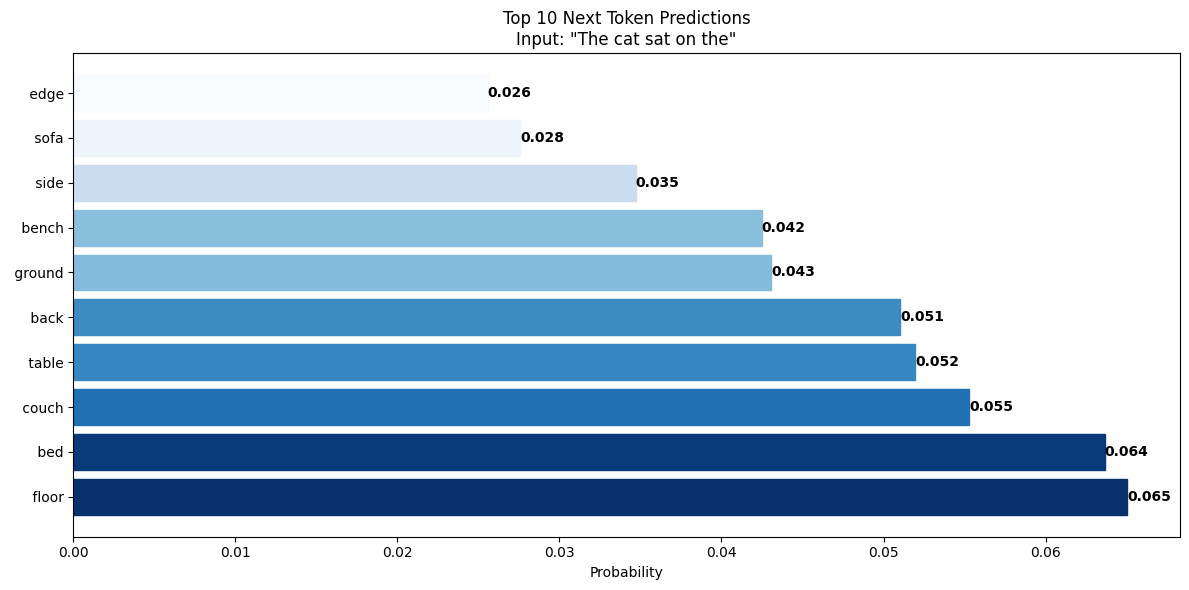


Analyzing: 'I love to eat'
Embedding(50257, 768)


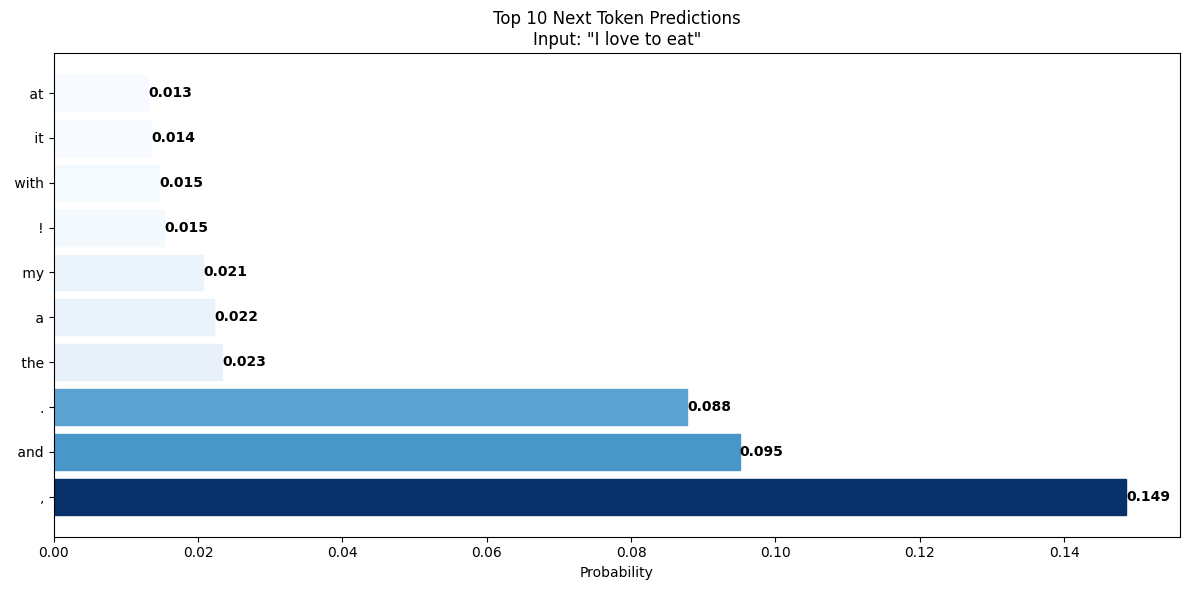


Analyzing: 'The weather today is'
Embedding(50257, 768)


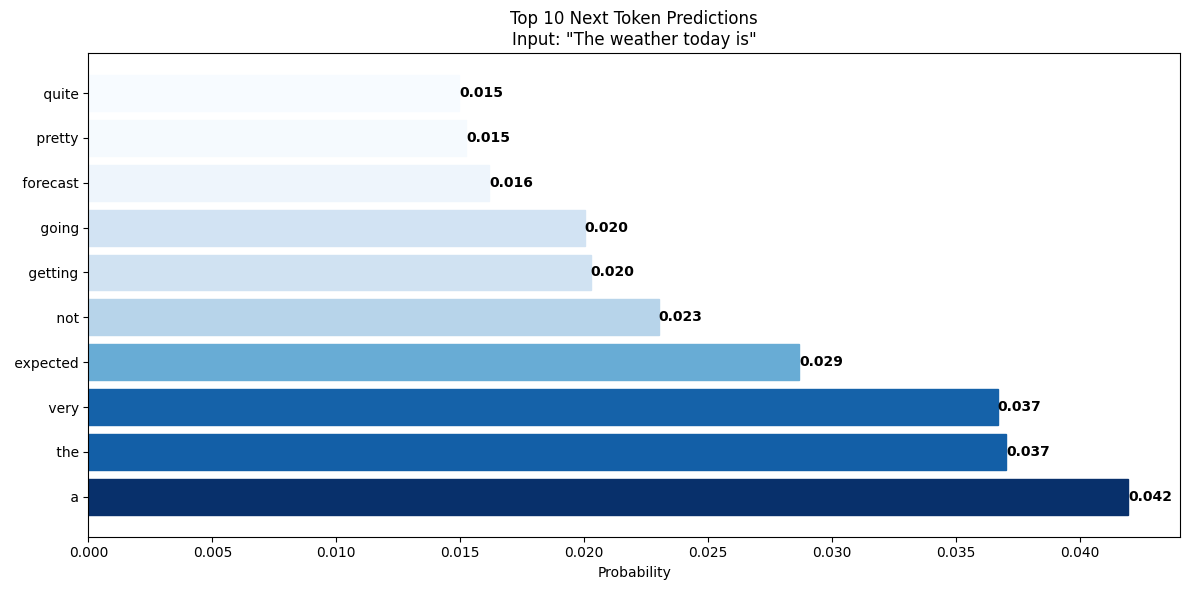


Analyzing: 'Once upon a'
Embedding(50257, 768)


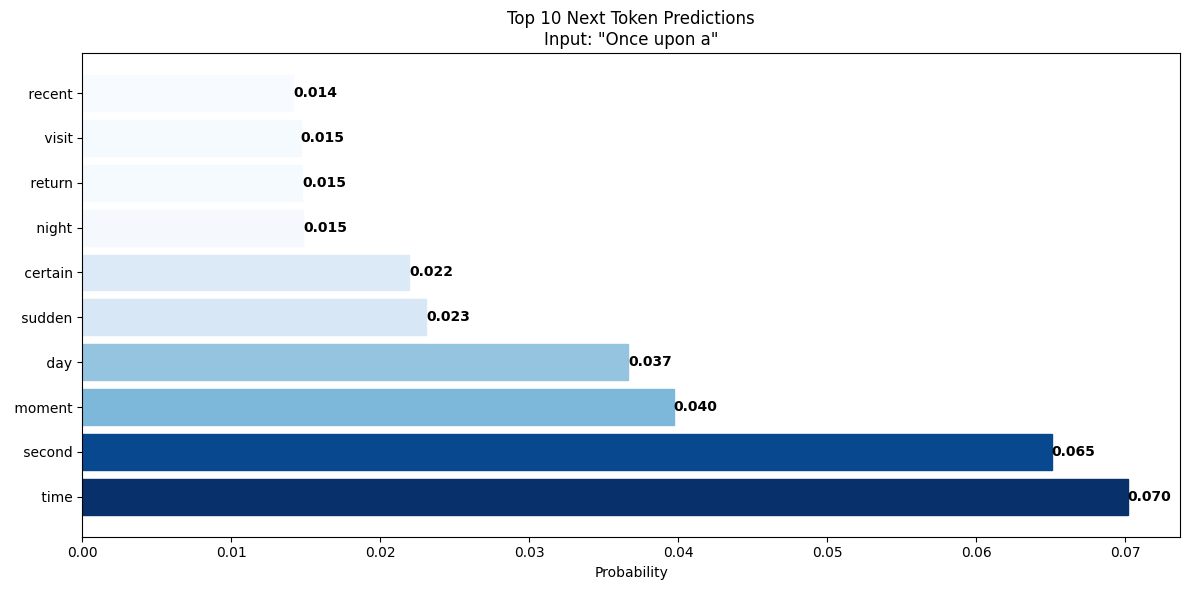

In [9]:
demonstrate_predictions()